In [1]:
from ncmcm import *
from IPython.display import display
import os
import pickle
os.chdir('..')
os.chdir('ncmcm')
print(os.getcwd())


/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm


In [2]:
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]
reps = 30
clusters = 20

(20, 30)
(20, 30)
(20, 30)
(20, 30)
(20, 30)


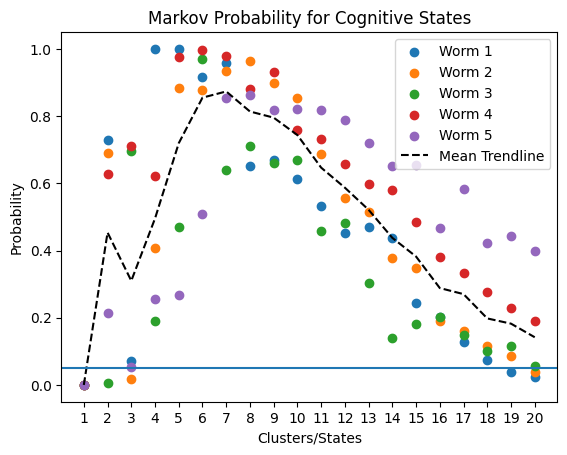

In [3]:
data_average_markov = []
WORMS = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i}.pkl', 'rb') as file:
		worm = pickle.load(file)
		WORMS.append(worm)
		print(worm.p_memoryless.shape)
		data_average_markov.append(np.mean(worm.p_memoryless, axis=1))

	
	

average_markov_plot(np.asarray(data_average_markov))

In [4]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


data = WORMS[0]
# Add a mapping (no mapping will create a BundDLeNet)
%matplotlib notebook 
vs = data.createVisualizer(use_predictor=False, epochs=500)
vs.make_comparison(show_legend=True, quivers=True)
print(type(vs.data.pred_model))

rf = ExtraTreesClassifier()
data.fit_model(rf, binary=False)
vs.make_comparison(show_legend=True, quivers=True)
print(type(vs.data.pred_model))

Losses 0.007426 0.010805 0.018231: 100%|██████████| 500/500 [00:22<00:00, 21.89it/s]

Points have coordinate shape:  (3122, 3)


<IPython.core.display.Javascript object>

Some points 15 used for accuracy calculation of the model are not plotted, since the mapping does not include them.
<class 'scripts.classes.CustomEnsembleModel'>
Accuracy: 1.0
Probability map has shape: (3137, 8)


<IPython.core.display.Javascript object>

Some points 15 used for accuracy calculation of the model are not plotted, since the mapping does not include them.
<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>


In [8]:
data = WORMS[2]
# Add a mapping (no mapping will create a BundDLeNet)
vs = data.createVisualizer(PCA(n_components=3))
vs.make_comparison(show_legend=True, quivers=True)
# its Predictor will be used in later plots
vs.useBundDLePredictor()
vs.make_comparison(show_legend=True, quivers=True)

Points have coordinate shape:  (3059, 3)


<IPython.core.display.Javascript object>

It seems there is no BundDLeNet attached yet. Use 'Visualizer.attachBundDLeNet()'!


<IPython.core.display.Javascript object>

True

In [3]:
print(os.getcwd())
print(os.listdir())


/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm
['functions.py', '.DS_Store', 'tests', '__init__.py', '__pycache__', 'BundDLeNet.py', 'movies', 'classes.py', 'data', 'dummy.py']


/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm
6 neurons have been removed.
Accuracy: 0.9021357985336309
Probability map has shape: (3137, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repet

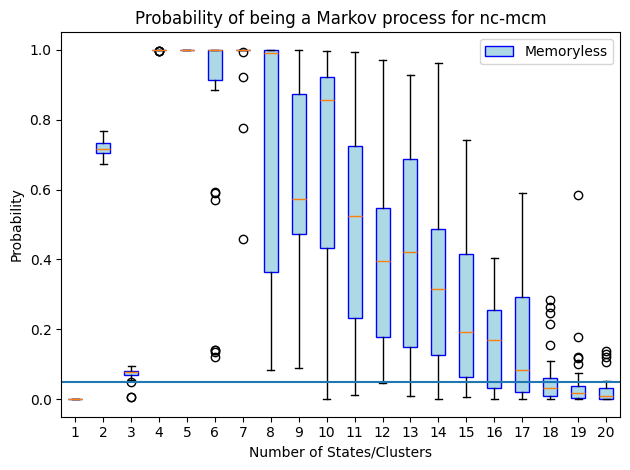

In [3]:
worm_num = 0

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline
data.cluster_BPT(nrep=reps, max_clusters=clusters, plot_markov=True)

with open(f'data/pickles/data_worm_{worm_num}_2.pkl', 'wb') as file:
    pickle.dump(data, file)

/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm
8 neurons have been removed.
Accuracy: 0.904594767070836
Probability map has shape: (3134, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repeti

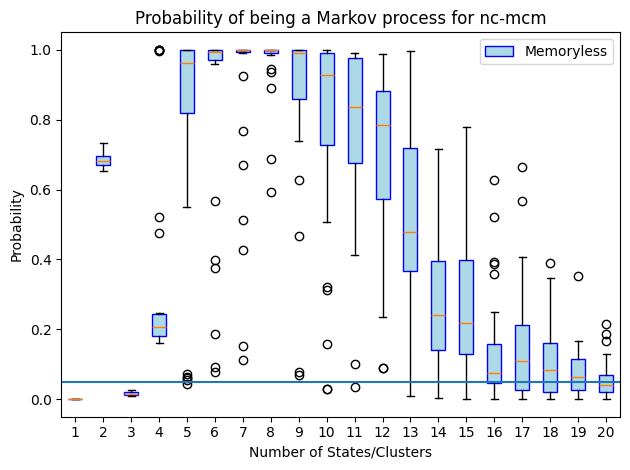

In [4]:
worm_num = 1

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline
data.cluster_BPT(nrep=reps, max_clusters=clusters, plot_markov=True)

with open(f'data/pickles/data_worm_{worm_num}_2.pkl', 'wb') as file:
    pickle.dump(data, file)

/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm
8 neurons have been removed.
Accuracy: 0.9427917620137299
Probability map has shape: (3059, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15
Testing markovianity - repetition  16
Testing markovianity - repetition  17
Testing markovianity - repetition  18
Testing markovianity - repetition  19
Testing markovianity - repetition  20
Testing markovianity - repetition  21
Testing markovianity - repetition  22
Testing markovianity - repet

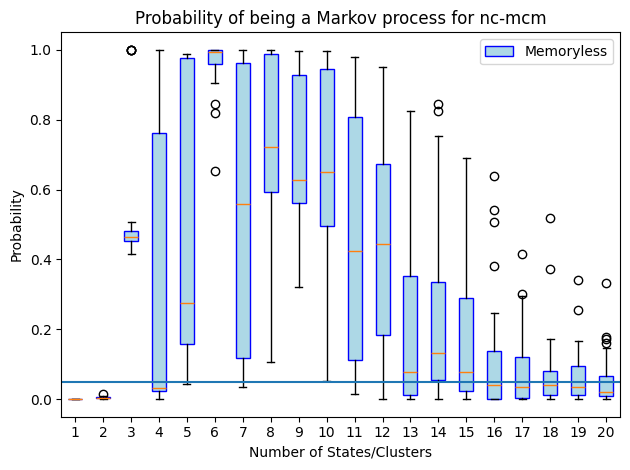

In [5]:
worm_num = 2

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline
data.cluster_BPT(nrep=reps, max_clusters=clusters, plot_markov=True)

with open(f'data/pickles/data_worm_{worm_num}_2.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
worm_num = 3

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline
data.cluster_BPT(nrep=reps, max_clusters=clusters, plot_markov=True)

with open(f'data/pickles/data_worm_{worm_num}_2.pkl', 'wb') as file:
    pickle.dump(data, file)

/Users/michaelhofer/Documents/GitHub/ncmcm/ncmcm
6 neurons have been removed.
Accuracy: 0.9492600422832981
Probability map has shape: (3311, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5
Testing markovianity - repetition  6
Testing markovianity - repetition  7
Testing markovianity - repetition  8
Testing markovianity - repetition  9
Testing markovianity - repetition  10
Testing markovianity - repetition  11
Testing markovianity - repetition  12
Testing markovianity - repetition  13
Testing markovianity - repetition  14
Testing markovianity - repetition  15


In [ ]:
worm_num = 4

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline
data.cluster_BPT(nrep=reps, max_clusters=clusters, plot_markov=True)

with open(f'data/pickles/data_worm_{worm_num}_2.pkl', 'wb') as file:
    pickle.dump(data, file)

(20, 30)
(20, 30)
(20, 30)
(20, 30)
(20, 30)


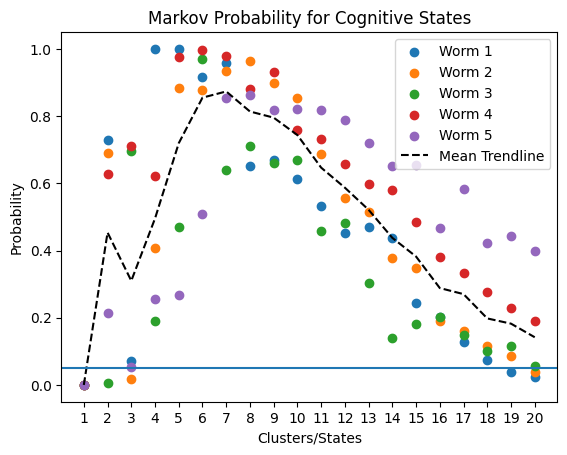

In [3]:
data_average_markov = []
WORMS = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i}.pkl', 'rb') as file:
		worm = pickle.load(file)
		WORMS.append(worm)
		print(worm.p_memoryless.shape)
		data_average_markov.append(np.mean(worm.p_memoryless, axis=1))

	
	

average_markov_plot(np.asarray(data_average_markov))

Worm number 1


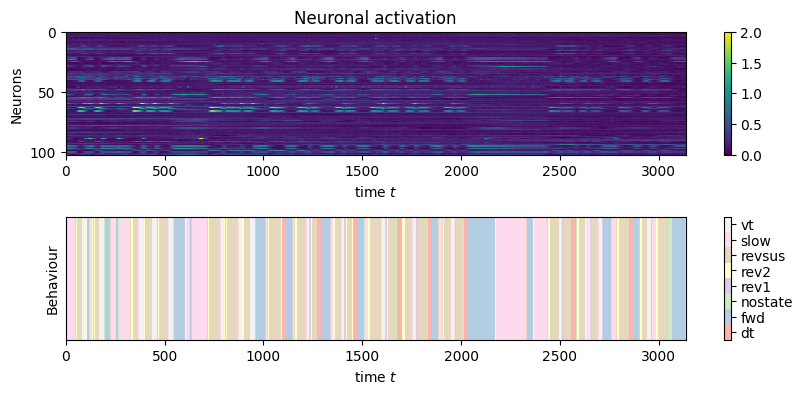

Worm number 2


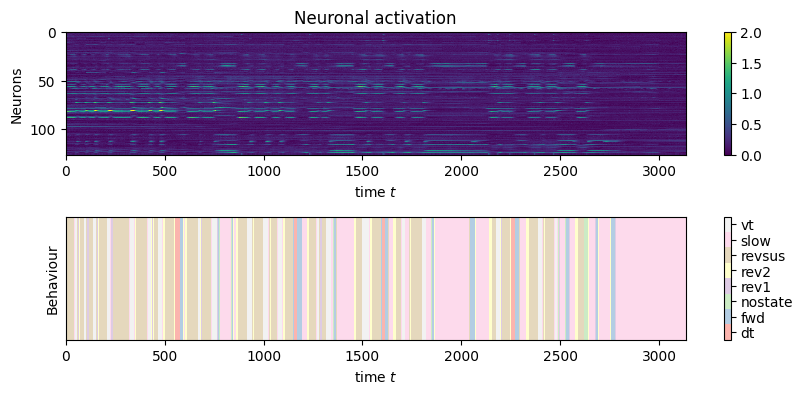

Worm number 3


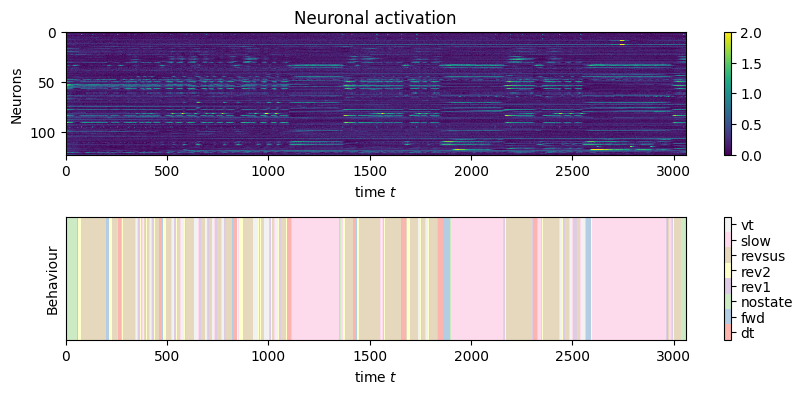

Worm number 4


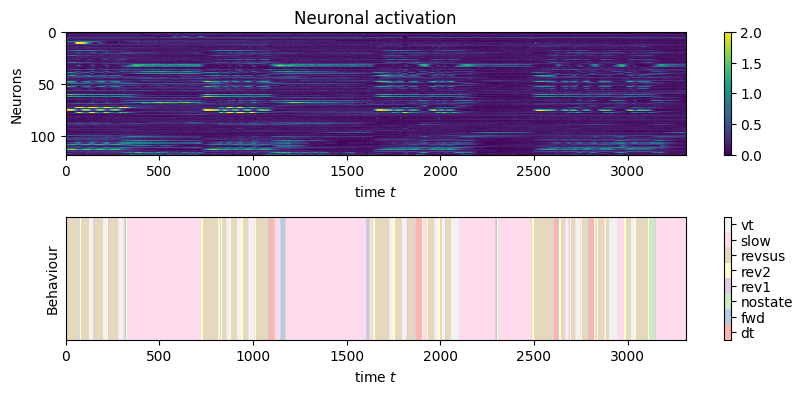

Worm number 5


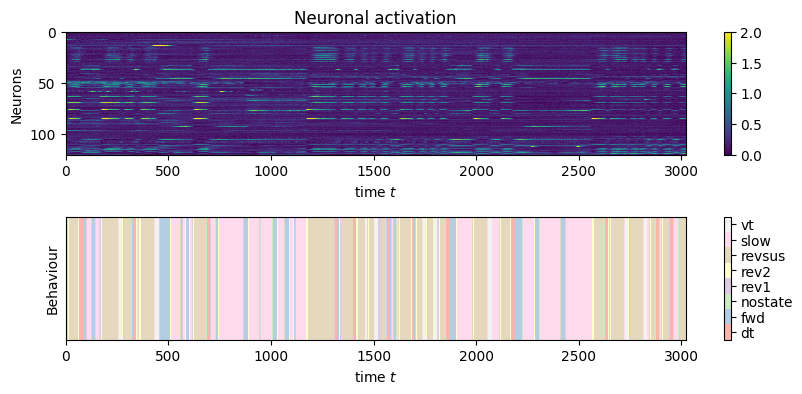

In [4]:
# Looking at data
%matplotlib inline
for i, w in enumerate(WORMS):
	print(f'Worm number {i+1}')
	w.plotting_neuronal_behavioural()
#data._behavior()
#data._neurons()

In [5]:
# Do some cool plots
#%matplotlib inline
%matplotlib notebook

data = WORMS[0]
vs1 = data.createVisualizer()
vs1.plot_mapping()

data = WORMS[1]
vs2 = data.createVisualizer()
vs2.plot_mapping()

data = WORMS[2]
vs3 = data.createVisualizer()
vs3.plot_mapping()
#data.behavioral_state_diagram(cog_stat_num=3, adj_matrix=True, save=False, interactive=True)
#data.step_plot(clusters=4)


Losses 0.007361 0.002608 0.009969: 100%|██████████| 2000/2000 [01:37<00:00, 20.51it/s]


Points have coordinate shape:  (3122, 3)
Accuracy of BundDLeNet: 0.946


<IPython.core.display.Javascript object>

Losses 0.004999 0.000055 0.005055: 100%|██████████| 2000/2000 [01:41<00:00, 19.78it/s]

Points have coordinate shape:  (3119, 3)
Accuracy of BundDLeNet: 0.955


<IPython.core.display.Javascript object>

Losses 0.011848 0.006475 0.018322:  31%|███       | 620/2000 [00:30<01:08, 20.28it/s]


KeyboardInterrupt: 

In [10]:
%matplotlib notebook
vs.make_movie(save=False, draw=False, quivers=True, interval=100)

<IPython.core.display.Javascript object>

True

Losses 0.006345 0.005407 0.011752: 100%|██████████| 2000/2000 [01:38<00:00, 20.22it/s]


Points have coordinate shape:  (3044, 3)


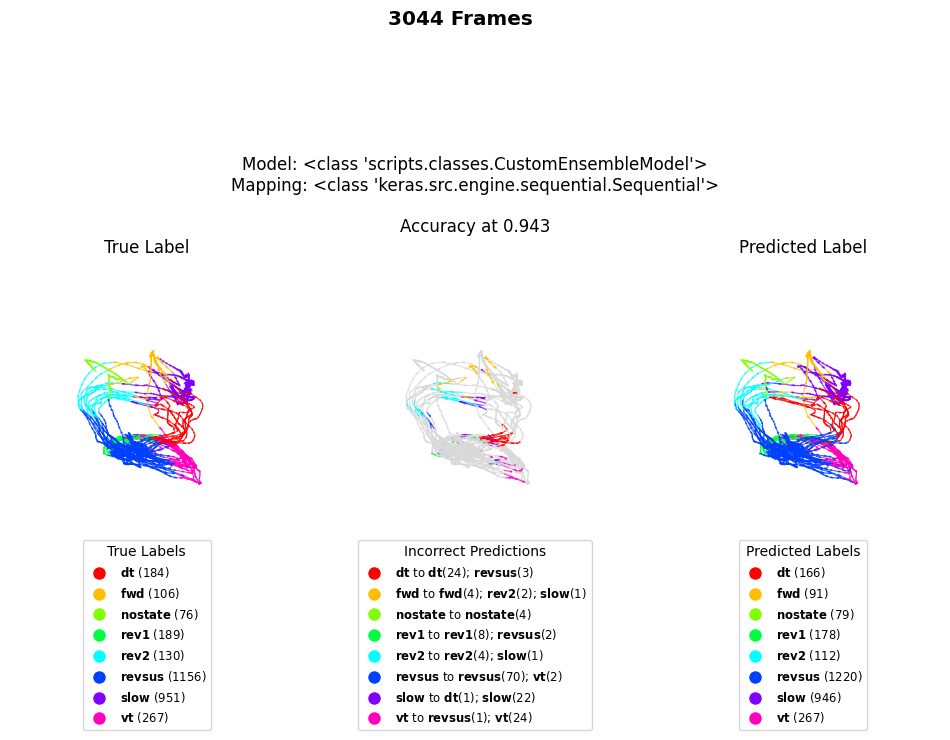

Some points 15 used for accuracy calculation of the model are not plotted, since the mapping does not include them.
Accuracy of BundDLeNet: 0.95


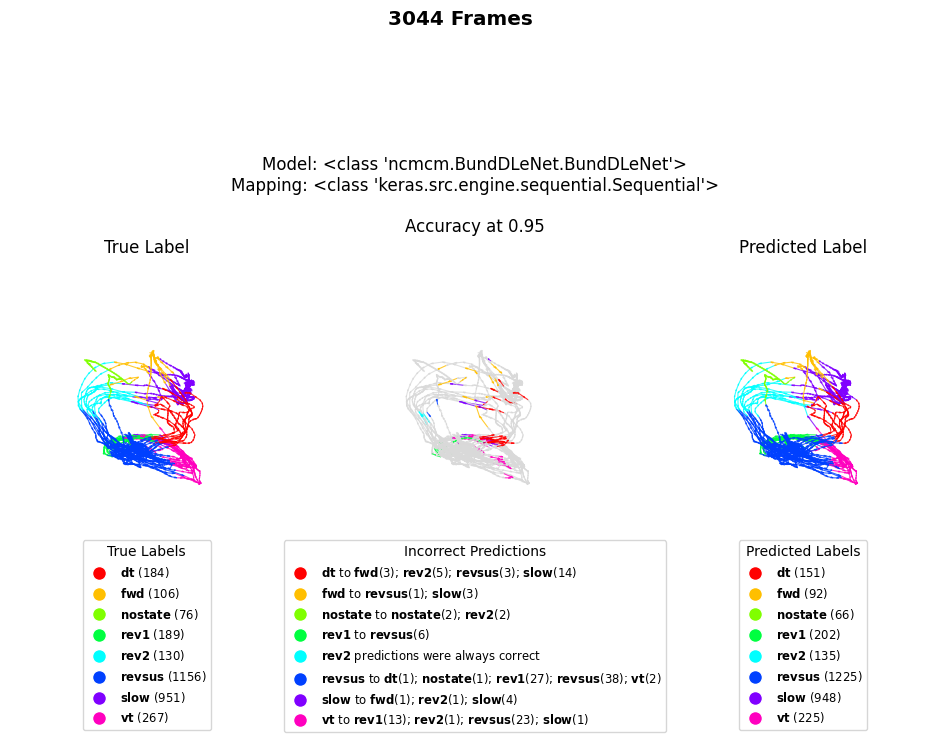

True

In [4]:
data = WORMS[2]
# Add a mapping (no mapping will create a BundDLeNet)
vs = data.createVisualizer(use_predictor=False)
vs.make_comparison(show_legend=True, quivers=True)
# its Predictor will be used in later plots
vs.useBundDLePredictor()
vs.make_comparison(show_legend=True, quivers=True)

In [7]:
%matplotlib notebook
vs.make_movie(interval=100, save=False, show_legend=True, grid_off=True, quivers=True)

<IPython.core.display.Javascript object>

True

HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


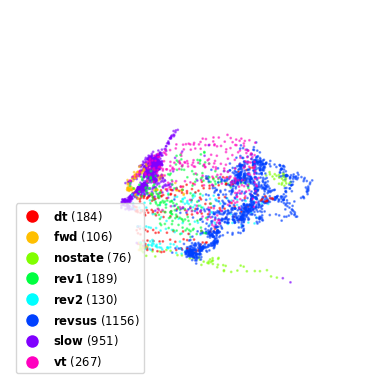

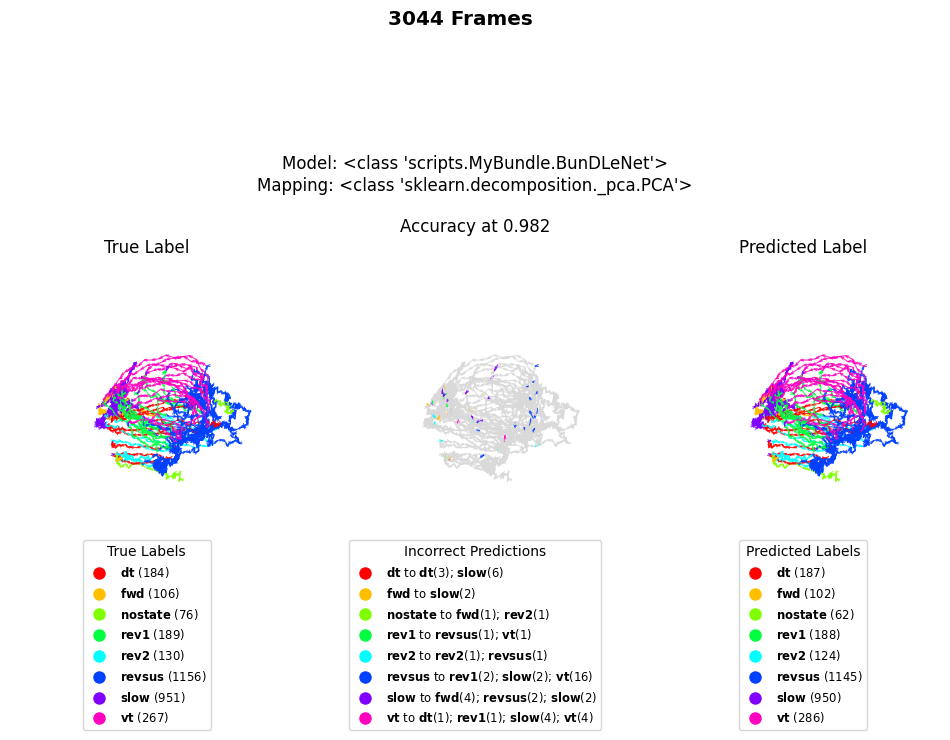

The prediction has fewer points than the true labels. Therefore 15 points are not plotted and also not used for accuracy calculation of the model
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)
WARNING! No BundleNet!
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


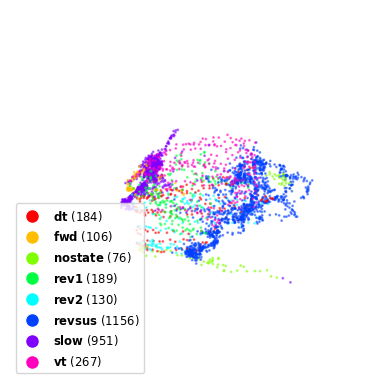

Accuracy: 0.7832625040863027
Probability map has shape: (3059, 28)


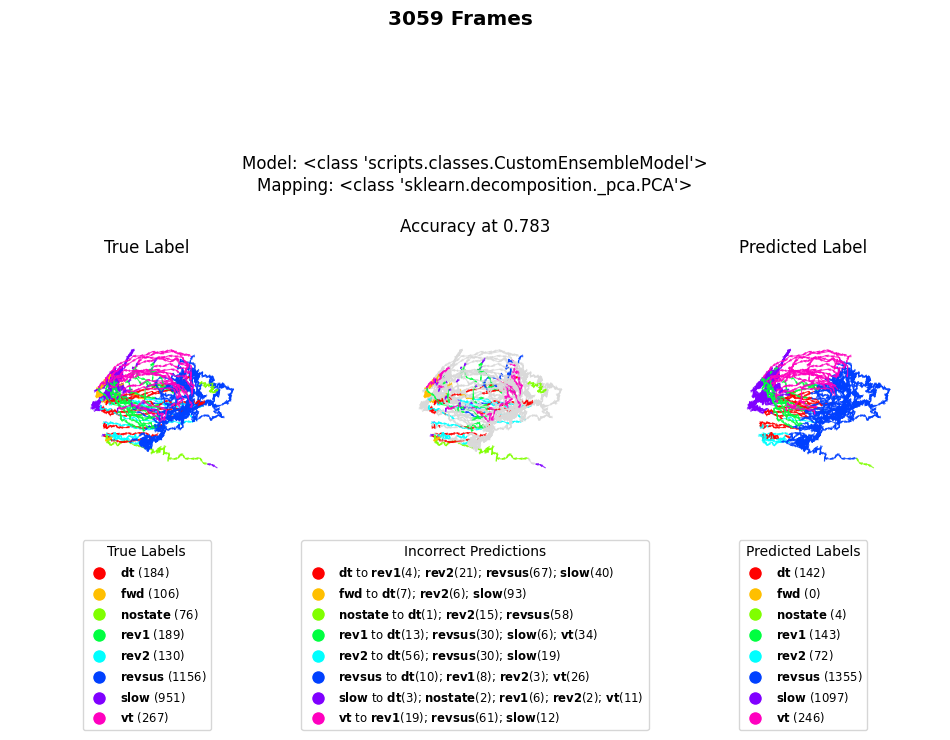

True

In [8]:
%matplotlib inline
# Attach a BundDLeNet to use tau for mapping into 3D space
vs.change_mapping(PCA(n_components=3))
vs.plot_mapping(show_legend=True)
vs.make_comparison(show_legend=True)
# Using mapping as input
simple_data = vs.use_mapping_as_input()
simple_vs = simple_data.createVisualizer(PCA(n_components=3))
simple_vs.plot_mapping(show_legend=True)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
simple_data.fit_model(logreg, binary=True)
simple_vs.make_comparison(show_legend=True)

In [9]:
%matplotlib inline
vs.attachBundDLeNet(l_dim=50,
				   epochs=2000,
				   window=15)
reduced_data = vs.use_mapping_as_input()

Losses 0.003261 0.000425 0.003686: 100%|██████████| 2000/2000 [01:51<00:00, 17.86it/s]


Points have coordinate shape:  (3044, 50)
Accuracy of BundleNet: 0.99
X (50, 3044)
Y (3044,)
Y-names (8,)
X-names (50,)


Accuracy: 0.9829172141918529
Probability map has shape: (3044, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5


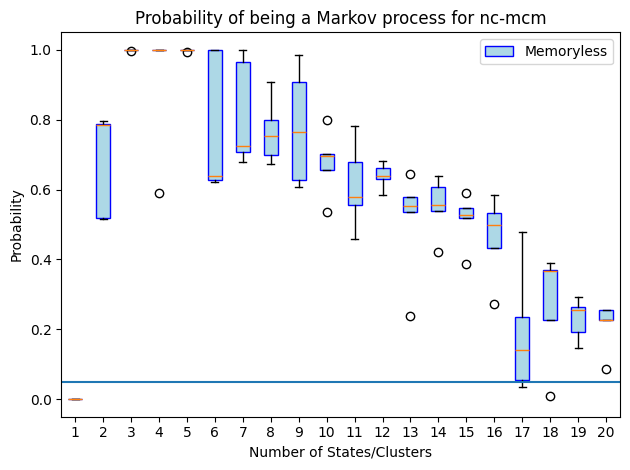

True

In [10]:
%matplotlib inline

logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
reduced_data.fit_model(logreg, binary=True)
reduced_data.cluster_BPT(nrep=5, max_clusters=20, plot_markov=True)

HAVE mapping MODEL
Points have coordinate shape:  (3044, 3)


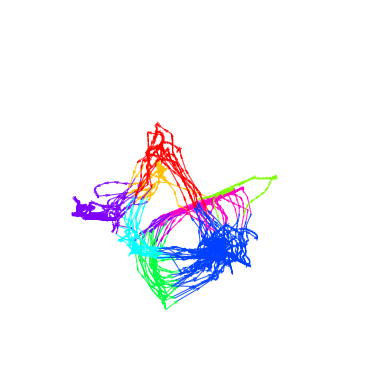

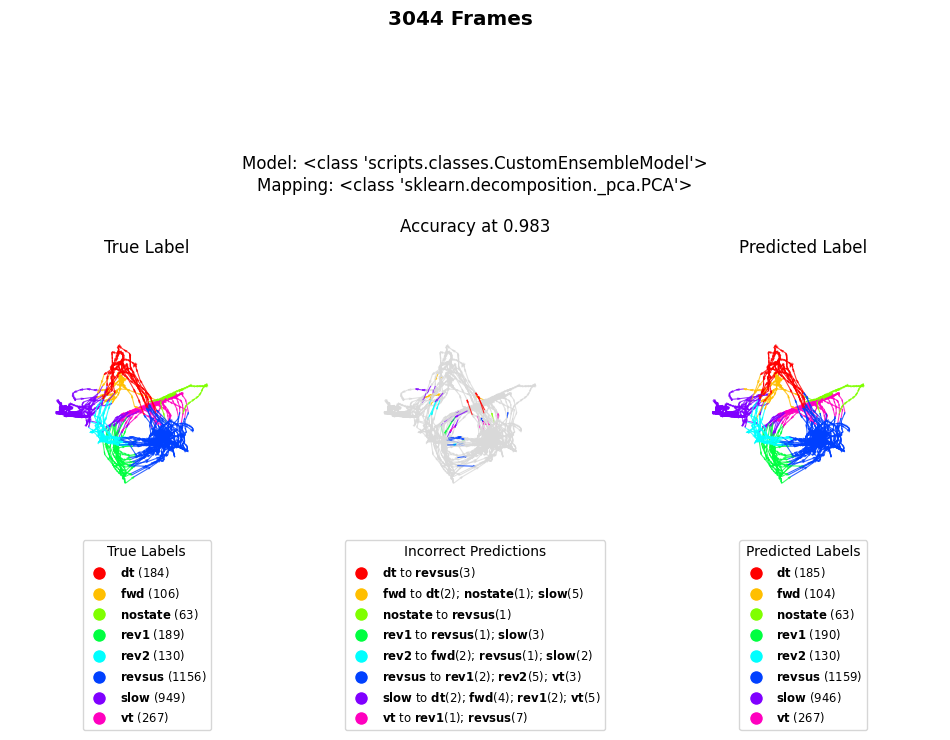

True

In [11]:
reduced_vs = reduced_data.createVisualizer(PCA(n_components=3))
reduced_vs.plot_mapping(show_legend=False, grid_off=True, quivers=True)
reduced_vs.make_comparison(show_legend=True, quivers=True)

In [12]:
reduced_vs.change_mapping(TSNE(n_components=3))

HAVE mapping MODEL
Points have coordinate shape:  (3044, 3)


True

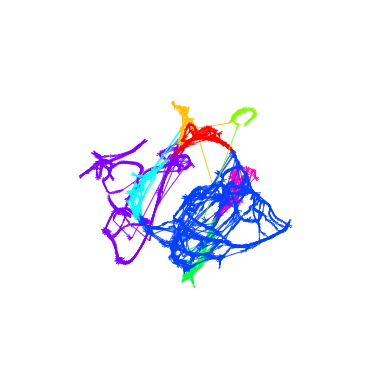

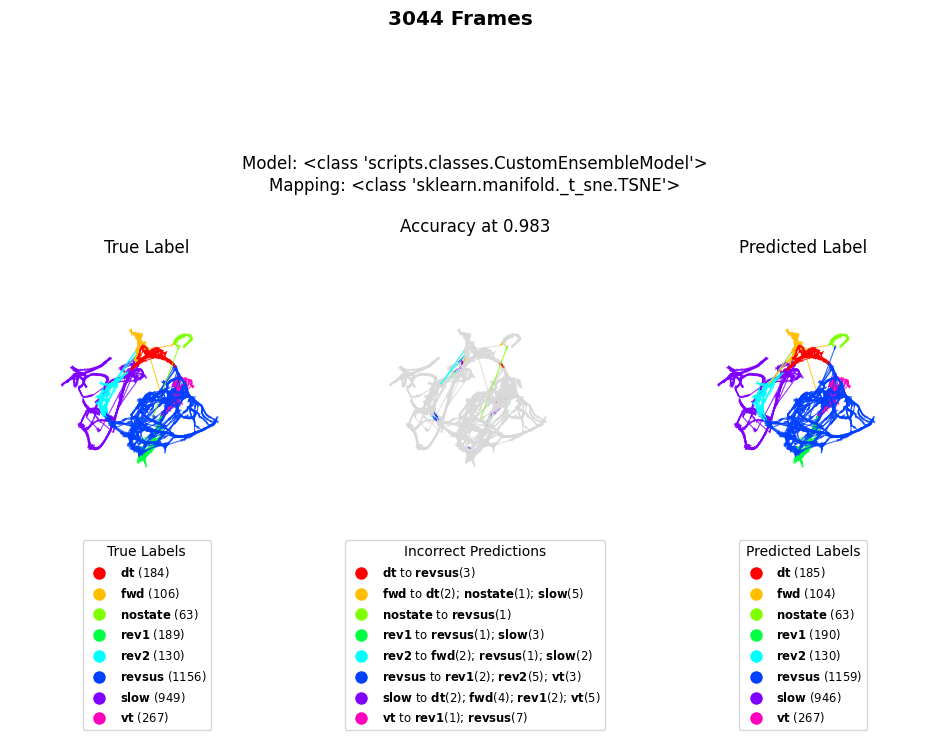

True

In [13]:
%matplotlib inline
reduced_vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
reduced_vs.make_comparison(show_legend=True, quivers=True)


Losses 0.007766 0.003158 0.010924: 100%|██████████| 2000/2000 [01:42<00:00, 19.60it/s]


Points have coordinate shape:  (3044, 3)
Accuracy of BundleNet: 0.98


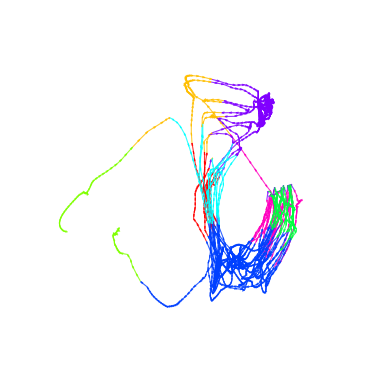

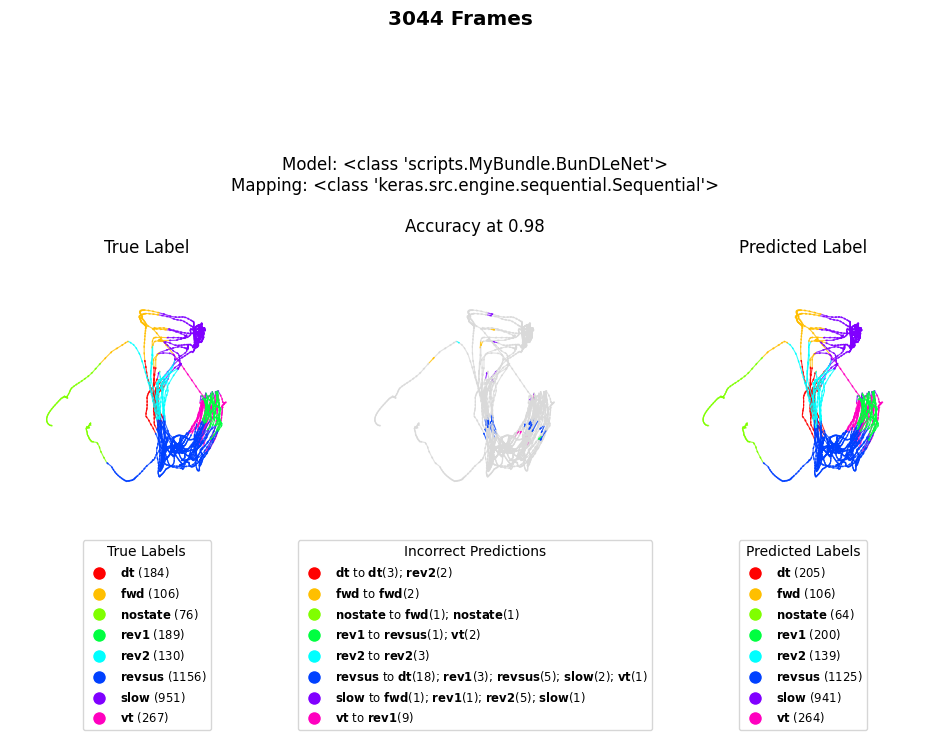

X (3, 3044)
Y (3044,)
Y-names (8,)
X-names (3,)


In [10]:
%matplotlib inline
vs = data.createVisualizer(l_dim=3, epochs=2000, window=15)
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True)
vs.make_comparison(show_legend=True, quivers=True)
reduced_data = vs.use_mapping_as_input()

Accuracy: 0.9799605781865965
Probability map has shape: (3044, 28)
HAVE mapping MODEL
Points have coordinate shape:  (3044, 3)


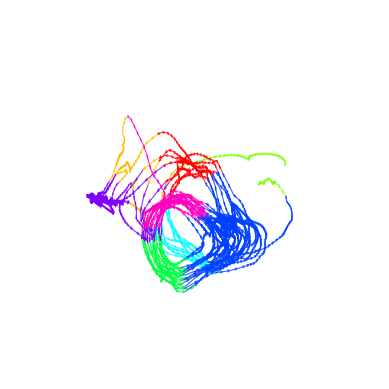

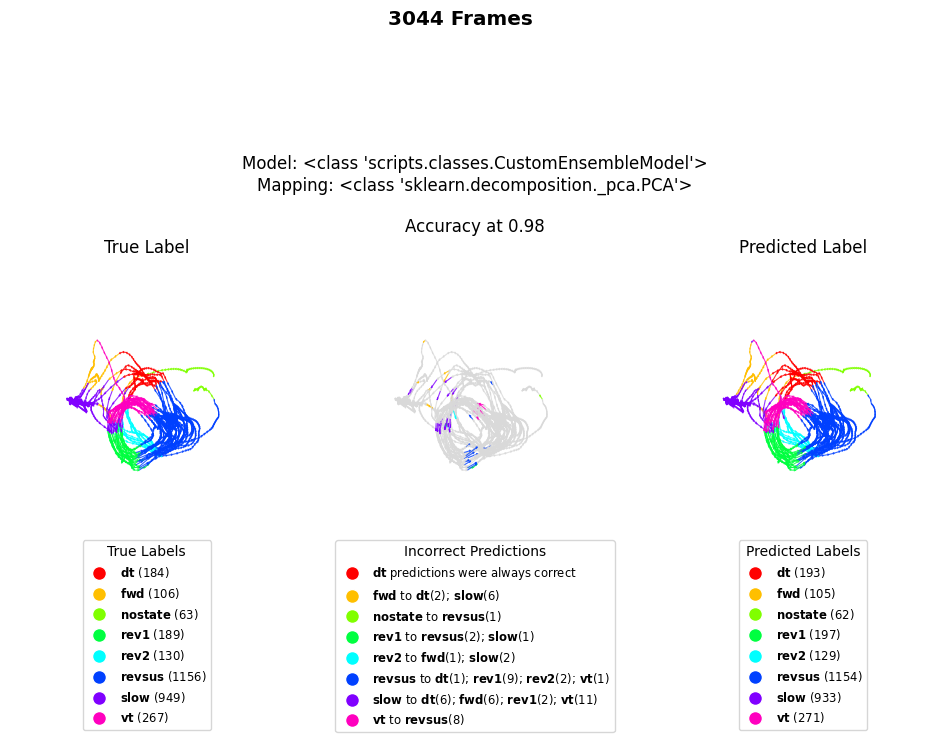

True

In [12]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
reduced_data.fit_model(logreg, binary=True)

reduced_vs = reduced_data.createVisualizer(PCA(n_components=3))
reduced_vs.plot_mapping(show_legend=False, grid_off=True, quivers=True)
reduced_vs.make_comparison(show_legend=True, quivers=True)